<a href="https://colab.research.google.com/github/thevirusx3/RNN-Projects/blob/master/Project1/stock-market-prediction-using-rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import Dependencies

import os 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [0]:
# Get Data
data = pd.read_csv('../input/google-stock-market-data/GOOG.csv', date_parser = True)
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
5,2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128600
6,2004-08-27,53.848164,54.107193,52.647663,52.876804,52.876804,6241200
7,2004-08-30,52.443428,52.548038,50.814533,50.814533,50.814533,5221400
8,2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941200
9,2004-09-01,51.158245,51.292744,49.648903,49.937820,49.937820,9181600


In [0]:
data_training = data[data['Date']<'2019-01-01'].copy()
data_test = data[data['Date']>='2019-01-01'].copy()

In [0]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [0]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training[0:5]

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       [4.91367646e-03, 4.01532941e-03, 3.15578542e-03, 1.98678849e-03,
        1.85522018e-01],
       [2.35285614e-03, 2.54928676e-03, 3.28434064e-03, 2.44873974e-03,
        1.11762967e-01]])

In [0]:
X_train = []
y_train = []

In [0]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

In [0]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
print(X_train.shape)
print(y_train.shape)

(3557, 60, 5)
(3557,)


**Building the Neural Network**

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [0]:
model = Sequential()

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [0]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [0]:
model.fit(X_train, y_train, epochs=5, batch_size=32)

Train on 3557 samples
Epoch 1/5
3557/3557 [==============================] - 28s 8ms/sample - loss: 0.0111
Epoch 2/5
3557/3557 [==============================] - 24s 7ms/sample - loss: 0.0017
Epoch 3/5
3557/3557 [==============================] - 24s 7ms/sample - loss: 0.0017
Epoch 4/5
3557/3557 [==============================] - 23s 7ms/sample - loss: 0.0016
Epoch 5/5
3557/3557 [==============================] - 24s 7ms/sample - loss: 0.0014


In [0]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [0]:
data_training = data[data['Date']<'2019-01-01'].copy()

past_60_days = data_training.tail(60)

df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [0]:
inputs = scaler.transform(df)
inputs

array([[0.93805611, 0.93755773, 0.92220906, 0.91781776, 0.0266752 ],
       [0.91527437, 0.91792904, 0.91350452, 0.90892169, 0.01425359],
       [0.90103881, 0.91343268, 0.89872289, 0.90204445, 0.02331778],
       ...,
       [0.93940683, 0.93712442, 0.93529076, 0.9247443 , 0.01947328],
       [0.92550693, 0.93064972, 0.92791493, 0.9339358 , 0.01954719],
       [0.93524016, 0.94894575, 0.95017564, 0.95130949, 0.01227612]])

In [0]:

X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [0]:

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((192, 60, 5), (192,))

In [0]:
y_pred = model.predict(X_test)

In [0]:
scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162775e-08])

In [0]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [0]:
y_pred = y_pred*scale
y_test = y_test*scale

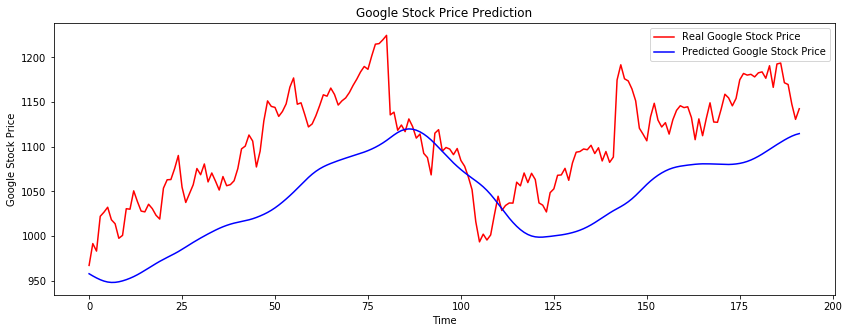

In [0]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()